# 09-Projeto-09-Solving-CIFAR-10

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import PIL
import pickle
import os
import tarfile

In [4]:
# path = 'datasets/cifar-100-python.tar.gz'
# tar = tarfile.open(path, 'r:gz')
# tar.extractall('datasets/')
# tar.close()

In [125]:

# with open ('datasets/cifar-100-python/train'.format(name), mode='rb') as training_data:
#     train = pickle.load(training_data, encoding='bytes')

    
# with open ('datasets/cifar-100-python/test'.format(name), mode='rb') as testing_data:
#     test = pickle.load(testing_data, encoding='bytes')

    
# X_train, y_train = train[b'data'], train[b'fine_labels']
# X_test, y_test = test[b'data'], test[b'fine_labels']


In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

/home/dsntos/.local/lib/python3.6/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


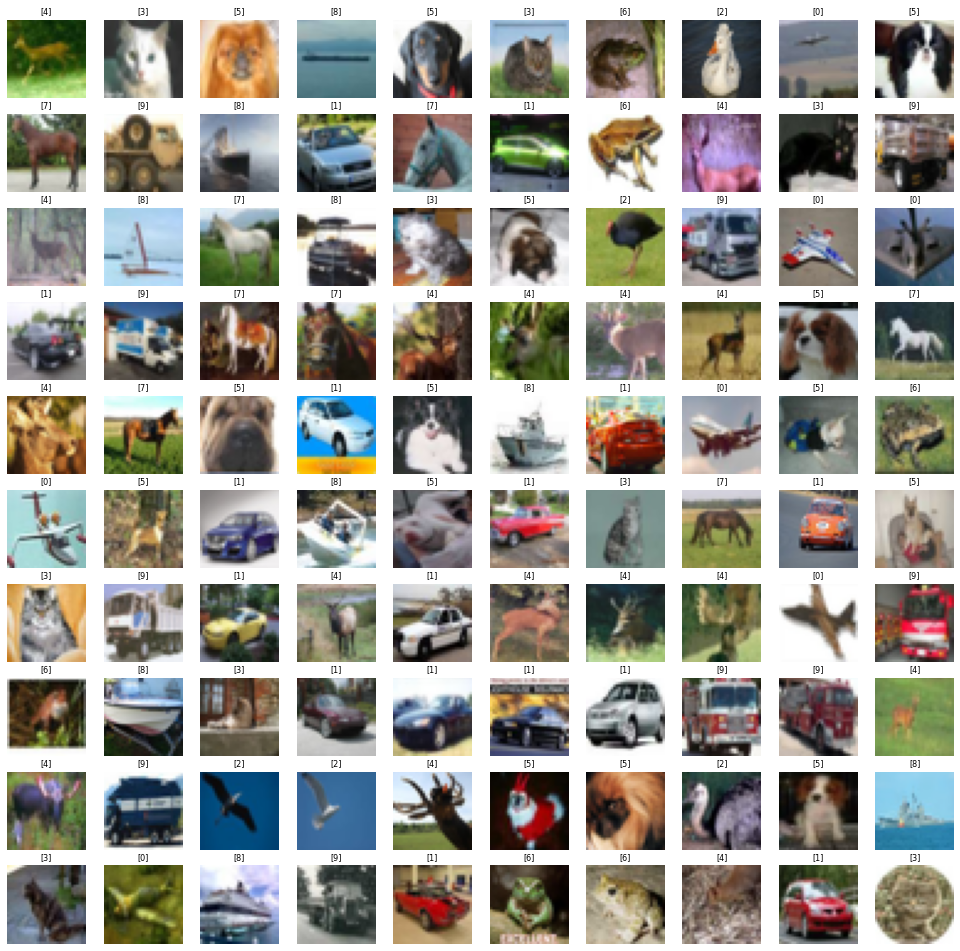

In [6]:
w_grid, l_grid = 10, 10
fig, axes = plt.subplots(l_grid, w_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, w_grid * l_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.2)

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_train, X_test = X_train/ 255, X_test/255

In [9]:
np.max(X_train), np.min(X_test)

(1.0, 0.0)

In [ ]:
#criando o modelo
from tensorflow.keras import layers, models

lenet = models.Sequential()

lenet.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,3)))
lenet.add(layers.AveragePooling2D())

lenet.add(layers.Conv2D(16, (5,5), activation='relu'))
lenet.add(layers.AveragePooling2D())

lenet.add(layers.Flatten())

lenet.add(layers.Dense(120, activation='relu'))
lenet.add(layers.Dense(84, activation='relu'))
lenet.add(layers.Dense(43, activation='softmax'))

lenet.summary()

In [165]:
lenet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [166]:
hist = lenet.fit(X_train, y_train, 
                batch_size=500, epochs=1500,
                validation_data=(X_test, y_test))

Epoch 1/150
100/100 [==============================] - 7s 69ms/step - loss: 2.2873 - accuracy: 0.1950 - val_loss: 1.9400 - val_accuracy: 0.2968
Epoch 2/150
100/100 [==============================] - 7s 66ms/step - loss: 1.7685 - accuracy: 0.3599 - val_loss: 1.6532 - val_accuracy: 0.3954
Epoch 3/150
100/100 [==============================] - 7s 65ms/step - loss: 1.5970 - accuracy: 0.4204 - val_loss: 1.5498 - val_accuracy: 0.4326
Epoch 4/150
100/100 [==============================] - 7s 65ms/step - loss: 1.5275 - accuracy: 0.4481 - val_loss: 1.5088 - val_accuracy: 0.4446
Epoch 5/150
100/100 [==============================] - 6s 65ms/step - loss: 1.4644 - accuracy: 0.4704 - val_loss: 1.4697 - val_accuracy: 0.4627
Epoch 6/150
100/100 [==============================] - 6s 65ms/step - loss: 1.4186 - accuracy: 0.4891 - val_loss: 1.3880 - val_accuracy: 0.4952
Epoch 7/150
100/100 [==============================] - 7s 67ms/step - loss: 1.3882 - accuracy: 0.5012 - val_loss: 1.3777 - val_accuracy:

100/100 [==============================] - 7s 71ms/step - loss: 0.6186 - accuracy: 0.7825 - val_loss: 1.2448 - val_accuracy: 0.6207
Epoch 114/150
100/100 [==============================] - 7s 73ms/step - loss: 0.6173 - accuracy: 0.7810 - val_loss: 1.2103 - val_accuracy: 0.6274
Epoch 115/150
100/100 [==============================] - 7s 73ms/step - loss: 0.6067 - accuracy: 0.7851 - val_loss: 1.2266 - val_accuracy: 0.6272
Epoch 116/150
100/100 [==============================] - 7s 73ms/step - loss: 0.6142 - accuracy: 0.7816 - val_loss: 1.2396 - val_accuracy: 0.6218
Epoch 117/150
100/100 [==============================] - 7s 68ms/step - loss: 0.6007 - accuracy: 0.7886 - val_loss: 1.2439 - val_accuracy: 0.6221
Epoch 118/150
100/100 [==============================] - 7s 67ms/step - loss: 0.5951 - accuracy: 0.7911 - val_loss: 1.2543 - val_accuracy: 0.6173
Epoch 119/150
100/100 [==============================] - 7s 68ms/step - loss: 0.6025 - accuracy: 0.7875 - val_loss: 1.2745 - val_accuracy:

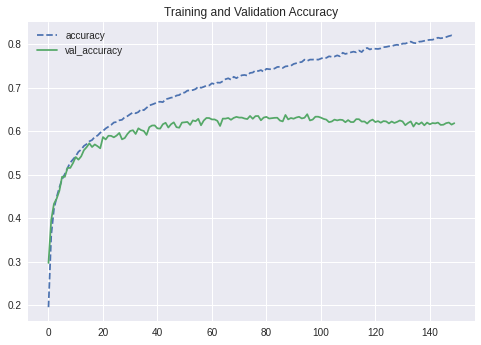

In [167]:
plt.style.use('seaborn')
plt.plot(hist.history['accuracy'],'--', label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

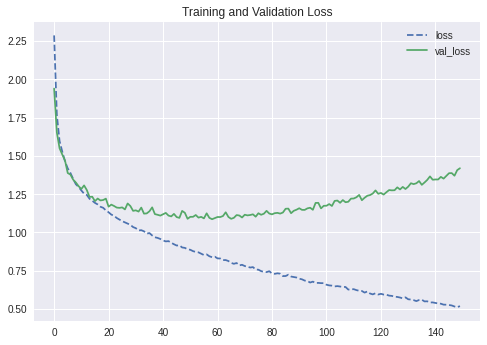

In [168]:
plt.style.use('seaborn')
plt.plot(hist.history['loss'],'--', label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.legend()

In [ ]:
#Convertendo para escala de cinza

In [169]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [171]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
#Convertendo os valores de cores para escala de cinza
X_train_gray = np.sum(X_train / 3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test / 3, axis=3, keepdims = True)


<Figure size 576x396 with 0 Axes>

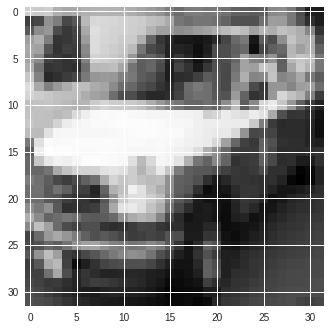

<Figure size 576x396 with 0 Axes>

In [172]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()

In [174]:
X_train_gray_norm, X_test_gray_norm = X_train_gray/255, X_test_gray/255


/home/dsntos/.local/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


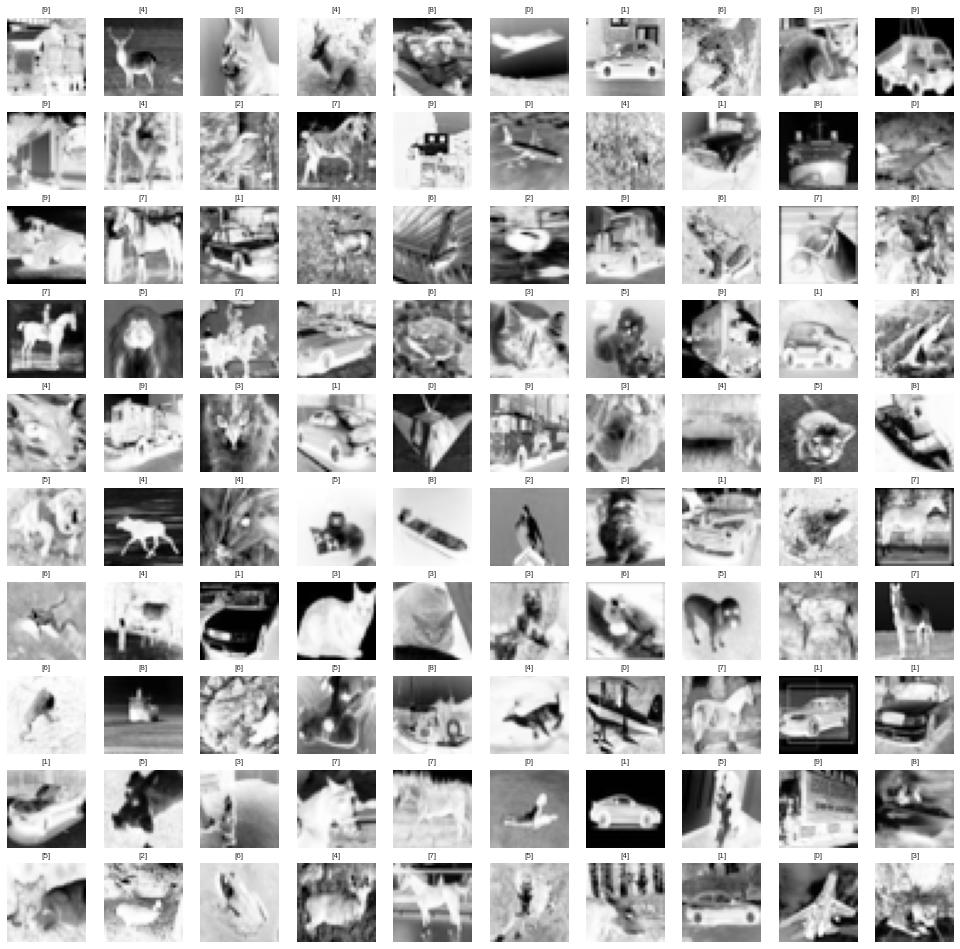

In [176]:
w_grid, l_grid = 10, 10
fig, axes = plt.subplots(l_grid, w_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, w_grid * l_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train_gray_norm[index])
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.2)

In [177]:
#criando o modelo
from tensorflow.keras import layers, models

lenet_gray = models.Sequential()

lenet_gray.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
lenet_gray.add(layers.AveragePooling2D())

lenet_gray.add(layers.Conv2D(16, (5,5), activation='relu'))
lenet_gray.add(layers.AveragePooling2D())

lenet_gray.add(layers.Flatten())

lenet_gray.add(layers.Dense(120, activation='relu'))
lenet_gray.add(layers.Dense(84, activation='relu'))
lenet_gray.add(layers.Dense(43, activation='softmax'))

lenet_gray.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_7 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_8 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [178]:
lenet_graylenet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [179]:
hist = lenet_gray.fit(X_train_gray_norm, y_train, 
                batch_size=500, epochs=1500,
                validation_data=(X_test_gray_norm, y_test))

Epoch 1/150
100/100 [==============================] - 5s 48ms/step - loss: 2.4440 - accuracy: 0.1494 - val_loss: 2.1453 - val_accuracy: 0.2126
Epoch 2/150
100/100 [==============================] - 5s 47ms/step - loss: 2.0386 - accuracy: 0.2613 - val_loss: 1.9309 - val_accuracy: 0.3096
Epoch 3/150
100/100 [==============================] - 5s 49ms/step - loss: 1.8552 - accuracy: 0.3367 - val_loss: 1.8064 - val_accuracy: 0.3458
Epoch 4/150
100/100 [==============================] - 5s 49ms/step - loss: 1.7464 - accuracy: 0.3731 - val_loss: 1.7294 - val_accuracy: 0.3814
Epoch 5/150
100/100 [==============================] - 5s 49ms/step - loss: 1.6845 - accuracy: 0.3984 - val_loss: 1.6594 - val_accuracy: 0.4065
Epoch 6/150
100/100 [==============================] - 5s 51ms/step - loss: 1.6389 - accuracy: 0.4175 - val_loss: 1.6088 - val_accuracy: 0.4253
Epoch 7/150
100/100 [==============================] - 5s 49ms/step - loss: 1.5981 - accuracy: 0.4328 - val_loss: 1.6108 - val_accuracy:

100/100 [==============================] - 5s 47ms/step - loss: 0.8153 - accuracy: 0.7156 - val_loss: 1.3139 - val_accuracy: 0.5792
Epoch 114/150
100/100 [==============================] - 5s 47ms/step - loss: 0.8132 - accuracy: 0.7183 - val_loss: 1.3119 - val_accuracy: 0.5804
Epoch 115/150
100/100 [==============================] - 5s 47ms/step - loss: 0.8033 - accuracy: 0.7203 - val_loss: 1.3236 - val_accuracy: 0.5791
Epoch 116/150
100/100 [==============================] - 5s 46ms/step - loss: 0.8008 - accuracy: 0.7227 - val_loss: 1.3114 - val_accuracy: 0.5796
Epoch 117/150
100/100 [==============================] - 5s 47ms/step - loss: 0.7964 - accuracy: 0.7225 - val_loss: 1.3332 - val_accuracy: 0.5725
Epoch 118/150
100/100 [==============================] - 5s 47ms/step - loss: 0.7937 - accuracy: 0.7237 - val_loss: 1.3147 - val_accuracy: 0.5801
Epoch 119/150
100/100 [==============================] - 5s 47ms/step - loss: 0.7944 - accuracy: 0.7235 - val_loss: 1.3463 - val_accuracy:

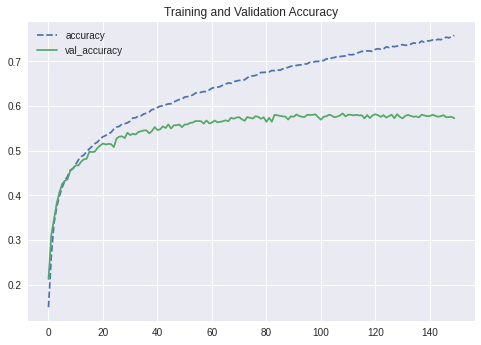

In [180]:
plt.style.use('seaborn')
plt.plot(hist.history['accuracy'],'--', label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

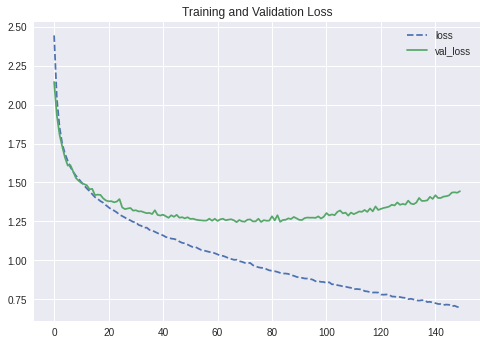

In [181]:
plt.style.use('seaborn')
plt.plot(hist.history['loss'],'--', label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.legend()

In [ ]:
X_train_gray_norm, X_test_gray_norm = (X_train_gray - 128) / 128, (X_test_gray - 128) / 128


In [182]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
#Convertendo os valores de cores para escala de cinza
X_train_gray = np.sum(X_train / 3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test / 3, axis=3, keepdims = True)


In [187]:
#criando o modelo
from tensorflow.keras import layers, models

lenet_gray = models.Sequential()

lenet_gray.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
lenet_gray.add(layers.AveragePooling2D())

lenet_gray.add(layers.Conv2D(16, (5,5), activation='relu'))
lenet_gray.add(layers.AveragePooling2D())

lenet_gray.add(layers.Flatten())

lenet_gray.add(layers.Dense(120, activation='relu'))
lenet_gray.add(layers.Dense(84, activation='relu'))
lenet_gray.add(layers.Dense(43, activation='softmax'))

lenet_gray.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_11 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_12 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_13 (Dense)             (None, 84)               

In [188]:
lenet_gray.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [189]:
hist = lenet_gray.fit(X_train_gray_norm, y_train, 
                batch_size=500, epochs=1500,
                validation_data=(X_test_gray_norm, y_test))

Epoch 1/250
100/100 [==============================] - 5s 48ms/step - loss: 2.3600 - accuracy: 0.1690 - val_loss: 2.1028 - val_accuracy: 0.2362
Epoch 2/250
100/100 [==============================] - 5s 47ms/step - loss: 2.0113 - accuracy: 0.2729 - val_loss: 1.9161 - val_accuracy: 0.3078
Epoch 3/250
100/100 [==============================] - 5s 48ms/step - loss: 1.8330 - accuracy: 0.3451 - val_loss: 1.7772 - val_accuracy: 0.3639
Epoch 4/250
100/100 [==============================] - 5s 47ms/step - loss: 1.7393 - accuracy: 0.3795 - val_loss: 1.7284 - val_accuracy: 0.3813
Epoch 5/250
100/100 [==============================] - 5s 47ms/step - loss: 1.6859 - accuracy: 0.3986 - val_loss: 1.6640 - val_accuracy: 0.4113
Epoch 6/250
100/100 [==============================] - 5s 47ms/step - loss: 1.6513 - accuracy: 0.4129 - val_loss: 1.6545 - val_accuracy: 0.4104
Epoch 7/250
100/100 [==============================] - 5s 47ms/step - loss: 1.6149 - accuracy: 0.4263 - val_loss: 1.6065 - val_accuracy:

100/100 [==============================] - 5s 47ms/step - loss: 0.7944 - accuracy: 0.7250 - val_loss: 1.4933 - val_accuracy: 0.5475
Epoch 114/250
100/100 [==============================] - 5s 47ms/step - loss: 0.7949 - accuracy: 0.7252 - val_loss: 1.5087 - val_accuracy: 0.5398
Epoch 115/250
100/100 [==============================] - 5s 47ms/step - loss: 0.7879 - accuracy: 0.7273 - val_loss: 1.5186 - val_accuracy: 0.5432
Epoch 116/250
100/100 [==============================] - 5s 48ms/step - loss: 0.7861 - accuracy: 0.7271 - val_loss: 1.5267 - val_accuracy: 0.5382
Epoch 117/250
100/100 [==============================] - 5s 48ms/step - loss: 0.7808 - accuracy: 0.7289 - val_loss: 1.5246 - val_accuracy: 0.5436
Epoch 118/250
100/100 [==============================] - 5s 47ms/step - loss: 0.7774 - accuracy: 0.7305 - val_loss: 1.5300 - val_accuracy: 0.5408
Epoch 119/250
100/100 [==============================] - 5s 47ms/step - loss: 0.7734 - accuracy: 0.7319 - val_loss: 1.5328 - val_accuracy:

100/100 [==============================] - 4s 45ms/step - loss: 0.4850 - accuracy: 0.8333 - val_loss: 2.2870 - val_accuracy: 0.5254
Epoch 226/250
100/100 [==============================] - 5s 45ms/step - loss: 0.4913 - accuracy: 0.8307 - val_loss: 2.2713 - val_accuracy: 0.5176
Epoch 227/250
100/100 [==============================] - 4s 44ms/step - loss: 0.4888 - accuracy: 0.8314 - val_loss: 2.2923 - val_accuracy: 0.5210
Epoch 228/250
100/100 [==============================] - 4s 45ms/step - loss: 0.4830 - accuracy: 0.8333 - val_loss: 2.2924 - val_accuracy: 0.5222
Epoch 229/250
100/100 [==============================] - 5s 45ms/step - loss: 0.4782 - accuracy: 0.8378 - val_loss: 2.3023 - val_accuracy: 0.5261
Epoch 230/250
100/100 [==============================] - 5s 45ms/step - loss: 0.4827 - accuracy: 0.8335 - val_loss: 2.3423 - val_accuracy: 0.5183
Epoch 231/250
100/100 [==============================] - 4s 45ms/step - loss: 0.4763 - accuracy: 0.8370 - val_loss: 2.3228 - val_accuracy:

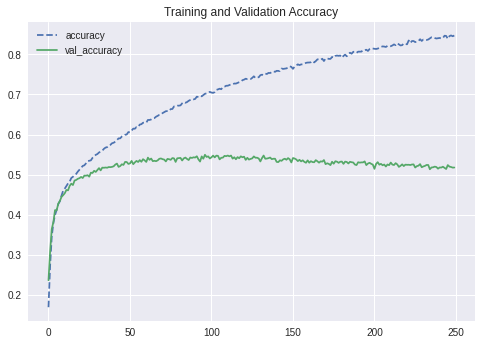

In [190]:
plt.style.use('seaborn')
plt.plot(hist.history['accuracy'],'--', label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

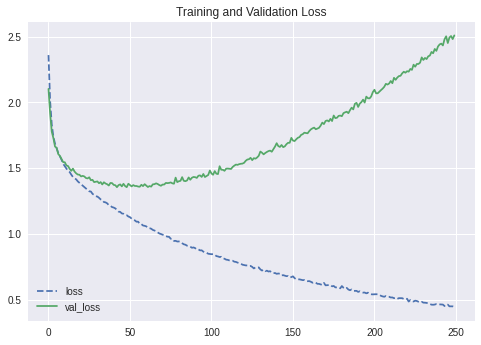

In [191]:
plt.style.use('seaborn')
plt.plot(hist.history['loss'],'--', label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.legend()